# 1. ZADAĆA 
## Loto 7/39

'Odigrajte sedam brojeva i osvojite milijun kuna'. U samo jednoj rečenici nalazi se srž igre na sreću koju svi popularno zovemo lutrija tj. Loto 7/39. Loto 7/39 je brojčana igra u kojoj je cilj pogoditi kojih će sedam brojeva biti izvućeno iz grupe brojeva od 1 do 39. Ponekad je jako teško oduprijeti se nagonu i kupovini listića. Na kraju krajeva, dajemo samo desetak kuna i imamo šansu osvojiti milijune. Međutim kolike su šanse za uspješno pogađanje svih sedam brojeva.
<br>

\begin{equation} {39 \choose 7} =
{39! \over 7! (39-7)!} = 15 380 937 
\end{equation}
<br>
\begin{equation} {1 \over 15 380 937} * 100 = 6.5016 * 10^{-6} \%
\end{equation}

<br>
Kako bi analizirala dobitne kombinacije izvućene tokom godina 2009-2017, preuzela sam sa [službene stranice Hrvatske lutrije](https://www.lutrija.hr/cms/Loto7Arhiva) arhivu dobitaka. Ponuđene su excel tablice po godinama. Radi lakše analize tablice sam prilagodila te spojila u jednu. 

Krenimo od učitavanja naše tablice:

In [1]:
import pandas as pd 
loto = pd.read_excel('Loto7od39.xls')
loto.columns

Index(['KOLO', 'DATUM', '1BR', '2BR', '3BR', '4BR', '5BR', '6BR', '7BR',
       'ZLATNA KUGLICA', 'SLOVO ZA "SUPER7"', 'DOBITAK"7"', 'DOBITAK "SUPER7"',
       'JOKER', 'UPLATA LOTO 7/39', 'UKUPNO ZA "7"', 'UPLATA "SUPER7"',
       'UKUPNO ZA "SUPER7"'],
      dtype='object')

In [2]:
loto.head()

,KOLO,DATUM,1BR,2BR,3BR,4BR,5BR,6BR,7BR,ZLATNA KUGLICA,"SLOVO ZA ""SUPER7""","DOBITAK""7""","DOBITAK ""SUPER7""",JOKER,UPLATA LOTO 7/39,"UKUPNO ZA ""7""","UPLATA ""SUPER7""","UKUPNO ZA ""SUPER7"""
0,104.0,30.12.,1,2,8,9,10,13,16,NE,B,-,-,296138.0,1520966.7,10000000,299564.1,1.70123e+07
1,103.0,27.12.,1,3,7,9,21,27,36,NE,A,-,-,977316.0,1173935.7,10000000,225656.1,1.69336e+07
2,102.0,23.12.,8,12,13,21,27,30,39,NE,B,-,-,718903.0,1444570.2,10000000,283858.2,1.68744e+07
3,101.0,20.12.,4,8,16,17,18,19,25,NE,B,-,-,987865.0,1344880.8,10000000,260028.9,1.67999e+07
4,100.0,16.12.,3,8,9,12,17,29,34,NE,A,-,-,837929.0,1464625.8,10000000,273955.5,1.67316e+07


In [3]:
loto.dtypes

KOLO                  float64
DATUM                  object
1BR                     int64
2BR                     int64
3BR                     int64
4BR                     int64
5BR                     int64
6BR                     int64
7BR                     int64
ZLATNA KUGLICA         object
SLOVO ZA "SUPER7"      object
DOBITAK"7"             object
DOBITAK "SUPER7"       object
JOKER                 float64
UPLATA LOTO 7/39      float64
UKUPNO ZA "7"          object
UPLATA "SUPER7"       float64
UKUPNO ZA "SUPER7"     object
dtype: object

Pojednostavimo si tablicu brišući podatke koje nećemo stići analizirati u ovoj bilježnici. Ti podaci nalaze se u stupcima pod nazivima: 
- ZLATNA KUGLICA, 
- SLOVO ZA "SUPER7"
- DOBITAK"7"
- DOBITAK "SUPER7"
- JOKER
- UPLATA LOTO 7/39
- UKUPNO ZA "7"
- UPLATA "SUPER7"
- UKUPNO ZA "SUPER7"

In [4]:
del loto['ZLATNA KUGLICA'], loto['SLOVO ZA "SUPER7"'], loto['DOBITAK"7"'], loto['DOBITAK "SUPER7"'], loto['JOKER'], loto['UPLATA LOTO 7/39'], loto['UKUPNO ZA "7"'], loto['UPLATA "SUPER7"'], loto['UKUPNO ZA "SUPER7"'] 

In [5]:
loto.head()

,KOLO,DATUM,1BR,2BR,3BR,4BR,5BR,6BR,7BR
0,104.0,30.12.,1,2,8,9,10,13,16
1,103.0,27.12.,1,3,7,9,21,27,36
2,102.0,23.12.,8,12,13,21,27,30,39
3,101.0,20.12.,4,8,16,17,18,19,25
4,100.0,16.12.,3,8,9,12,17,29,34


--------------------
# Pogledajmo DATUM

In [6]:
loto[['KOLO','DATUM']][0:901:50]

,KOLO,DATUM
0,104.0,30.12.
50,54.0,8.7.
100,4.0,14.1.
150,59.0,23.7.
200,9.0,30.1.
250,63.0,8.8.
300,13.0,14.2.
350,68.0,23.8.
400,18.0,1.3.
450,72.0,07.09.


Uočimo da se u bazi nalaze datumi na razne načine zapisani. Budući da će nam biti potrebni točni datumi za izradu određenih grafova te pregled kola po godinama stoga na početku prilagodimo bazu podataka budućim zahtjevima.
#### Konvertirajmo DATUM iz object u date time
Implementirajmo funkciju `convert_date()` koja dijeluje na stupac `'DATUM'` te kao rezultat daje pregledan zapis datuma tj. tip stupca `datetime64[ns]`.
<br>
Postupak:
1. iz stringa `'DATUM'` izvućemo dan 
2. iz stringa `'DATUM'` izvućemo mjesec
3. dodamo godinu ovisno o kolu
4. nova tri stupca spojimo u datum
5. obrišemo stupce koji sam nam pomogli u kreiranju

In [7]:
num_of_rows= loto["KOLO"].count()
num_of_rows

939

In [8]:
def convert_date():
    year= []
    month= []
    dani= []
    y=2017
    for i in range (0, num_of_rows ):
        first_dot= loto['DATUM'][i].find(".")
        d= int(loto['DATUM'][i][0:first_dot])
        second_dot= loto['DATUM'][i].find(".", first_dot + 1)
        m = int(loto['DATUM'][i][first_dot+1:second_dot])

        if (i>0 and (loto['KOLO'][i-1]<loto['KOLO'][i] ) ):
            y = y- 1


        month.append(m)
        dani.append(d)
        year.append(y)

    loto['DAN']= dani
    loto['MJESEC']= month
    loto['GOD']= year
    loto['DATUM'] = pd.to_datetime(dict(year=loto['GOD'], month=loto['MJESEC'], day=loto['DAN']))
    del loto['DAN'], loto['MJESEC']

In [9]:
convert_date()

In [10]:
loto[['KOLO','DATUM']][0:901:50]

,KOLO,DATUM
0,104.0,2017-12-30
50,54.0,2017-07-08
100,4.0,2017-01-14
150,59.0,2016-07-23
200,9.0,2016-01-30
250,63.0,2015-08-08
300,13.0,2015-02-14
350,68.0,2014-08-23
400,18.0,2014-03-01
450,72.0,2013-09-07


In [11]:
loto.dtypes

KOLO            float64
DATUM    datetime64[ns]
1BR               int64
2BR               int64
3BR               int64
4BR               int64
5BR               int64
6BR               int64
7BR               int64
GOD               int64
dtype: object

In [12]:
loto.head()

,KOLO,DATUM,1BR,2BR,3BR,4BR,5BR,6BR,7BR,GOD
0,104.0,2017-12-30,1,2,8,9,10,13,16,2017
1,103.0,2017-12-27,1,3,7,9,21,27,36,2017
2,102.0,2017-12-23,8,12,13,21,27,30,39,2017
3,101.0,2017-12-20,4,8,16,17,18,19,25,2017
4,100.0,2017-12-16,3,8,9,12,17,29,34,2017


--------------------------
Radi preglednosti tip podataka stupca `'KOLO'` iz float prebacimo u integer. 

In [13]:
loto['KOLO'][:10]

0    104.0
1    103.0
2    102.0
3    101.0
4    100.0
5     99.0
6     98.0
7     97.0
8     96.0
9     95.0
Name: KOLO, dtype: float64

In [14]:
import numpy as np
loto['KOLO'] = loto['KOLO'].astype(np.int64)

In [15]:
loto.dtypes

KOLO              int64
DATUM    datetime64[ns]
1BR               int64
2BR               int64
3BR               int64
4BR               int64
5BR               int64
6BR               int64
7BR               int64
GOD               int64
dtype: object

# Pojavljivanje brojeva
Dobitna kombinacija sastoji se od sedam brojeva koji su iz skupa $ \{1, 2, ..., 38, 39\}$. 

#### Pogledajmo koliko se učestalo pojavljuje pojedini broj.
U tu svrhu kreirajmo matricu ${(39 \times 2)}$ tako da drugi stupac čuva vrijednost koliko se puta u dobitnim kombinacijama pojavio broj opisan u prvom stupcu. Svaki redak matrice odgovara određenom broju. 

In [16]:
draw_number= np.zeros([39, 2], dtype=np.int64)
#popuni prvi stupac
for i in range (0, 39):
    draw_number[i][0]=i+1
#draw_number

In [17]:
for i in range (0, num_of_rows):
    draw_number[loto['1BR'][i] -1 ][1] +=1
    draw_number[loto['2BR'][i] -1 ][1] +=1
    draw_number[loto['3BR'][i] -1 ][1] +=1
    draw_number[loto['4BR'][i] -1 ][1] +=1
    draw_number[loto['5BR'][i] -1 ][1] +=1
    draw_number[loto['6BR'][i] -1 ][1] +=1
    draw_number[loto['7BR'][i] -1 ][1] +=1
#draw_number

In [18]:
for i in range (0, 39):
    print ( draw_number[i][0], '->', draw_number[i][1])

1 -> 195
2 -> 157
3 -> 180
4 -> 172
5 -> 172
6 -> 167
7 -> 184
8 -> 174
9 -> 175
10 -> 154
11 -> 174
12 -> 137
13 -> 157
14 -> 169
15 -> 175
16 -> 158
17 -> 166
18 -> 161
19 -> 161
20 -> 161
21 -> 157
22 -> 197
23 -> 177
24 -> 177
25 -> 172
26 -> 182
27 -> 184
28 -> 171
29 -> 177
30 -> 177
31 -> 154
32 -> 169
33 -> 153
34 -> 165
35 -> 148
36 -> 159
37 -> 167
38 -> 163
39 -> 175


Ispravnost popunjavanja matrice možemo provjeriti na razne načine. Jedana od jednakosti koja se mora ispunjavati:
<br>
$\Longrightarrow$ svaka dobitna kombinacija sastoji se od 7 brojeva $ == $ suma pojavljivanja svih brojeva


In [19]:
num_of_rows*7 == sum(draw_number)[1]

True

<br>
Kako bi saznali koji su brojevi najviše a koji najmanje puta bili izvućeni, iskoristit ćemo funkcije `.max()` i `.min()`.

In [20]:
num, draw= draw_number.T
draw.max(), draw.min()

(197, 137)

In [21]:
for i in range (0, 39):
    if draw_number[i][1] == draw.max():
        print ( 'Broj', i + 1, ' je izvućen ', draw.max(), ' puta.')

Broj 22  je izvućen  197  puta.


In [22]:
for i in range (0, 39):
    if draw_number[i][1] == draw.min():
        print ( 'Broj', i + 1, ' je izvućen ', draw.min(), ' puta.')

Broj 12  je izvućen  137  puta.


#### Prikažimo grafički koliko je puta pojedini broj bio izvućeni

In [23]:
from matplotlib import pyplot as plt
plt.bar(num, draw, align='center', alpha=0.5)
plt.xticks(num, num)
plt.xlabel('Number')
plt.ylabel('Draw')
plt.rcParams["figure.figsize"] = [16,9]

# Analizirajmo sume dobitnih kombinacija
#### kreirajmo stupac SUMA

In [24]:
for i in range (0, num_of_rows):
    suma= loto['1BR'] + loto['2BR'] + loto['3BR'] + loto['4BR'] + loto['5BR'] + loto['6BR'] + loto['7BR']
    loto['SUMA']= suma

In [25]:
loto.head()

,KOLO,DATUM,1BR,2BR,3BR,4BR,5BR,6BR,7BR,GOD,SUMA
0,104,2017-12-30,1,2,8,9,10,13,16,2017,59
1,103,2017-12-27,1,3,7,9,21,27,36,2017,104
2,102,2017-12-23,8,12,13,21,27,30,39,2017,150
3,101,2017-12-20,4,8,16,17,18,19,25,2017,107
4,100,2017-12-16,3,8,9,12,17,29,34,2017,112


In [26]:
loto['SUMA'].max(), loto['SUMA'].min(), loto['SUMA'].mean()

(226, 59, 139.12140575079871)

#### Pogledajmo odnos između suma dobitnih kombinacija te datuma kada su izvućeni.

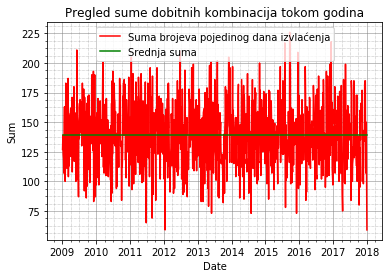

In [27]:
fig1, ax1 = plt.subplots()

ax1.set_title('Pregled sume dobitnih kombinacija tokom godina')
plt.xlabel('Date')
plt.ylabel('Sum')

plt.rcParams["figure.figsize"] = [16,9]

plt.minorticks_on()

plt.grid(which='major', linestyle='-', linewidth='0.5', color='grey' )
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='grey')

ax1.plot(loto['DATUM'], loto['SUMA'], color='r', label='Suma brojeva pojedinog dana izvlaćenja')

mid = np.full(num_of_rows, loto['SUMA'].mean() , dtype=np.int64)
ax1.plot(loto['DATUM'], mid, color='g', label='Srednja suma')

ax1.legend(loc=9)

#### Pogledajmo po pojedinoj godini odnos između suma dobitnih kombinacija te datuma.

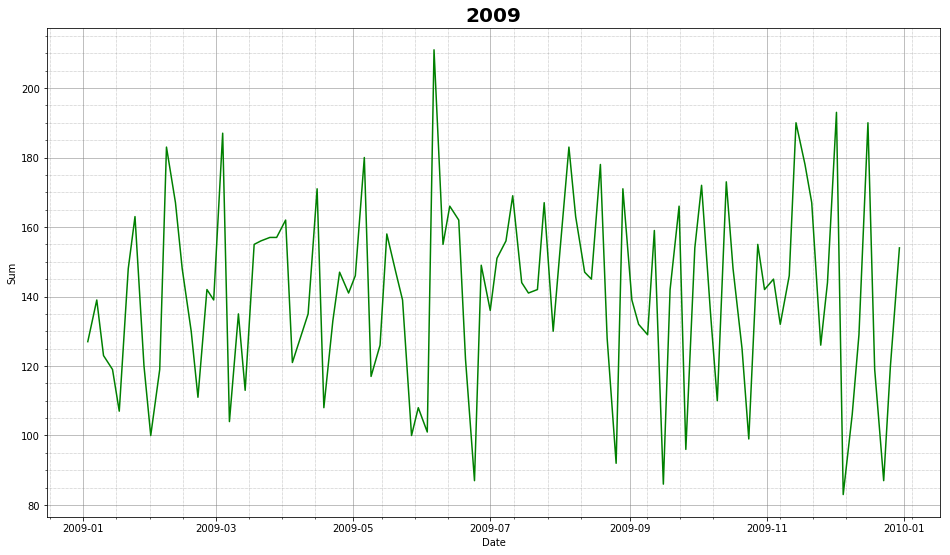

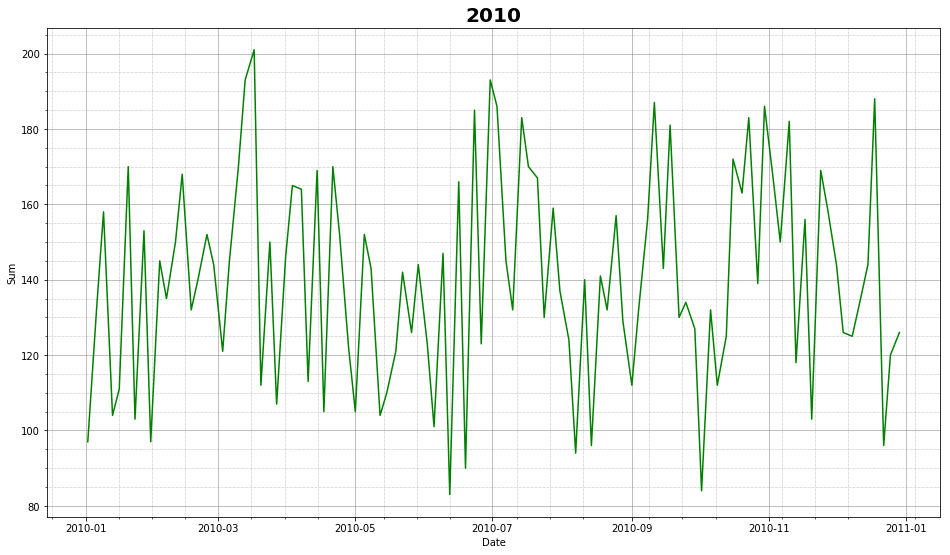

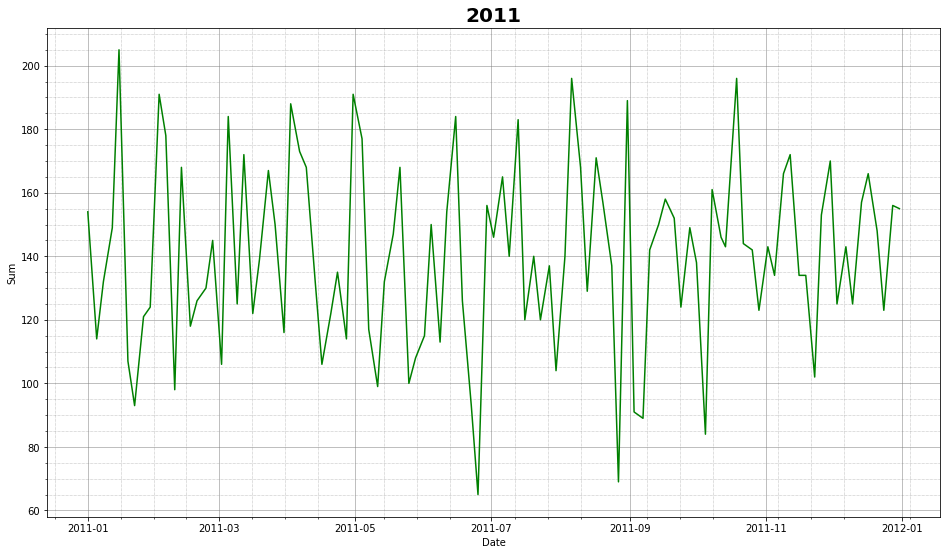

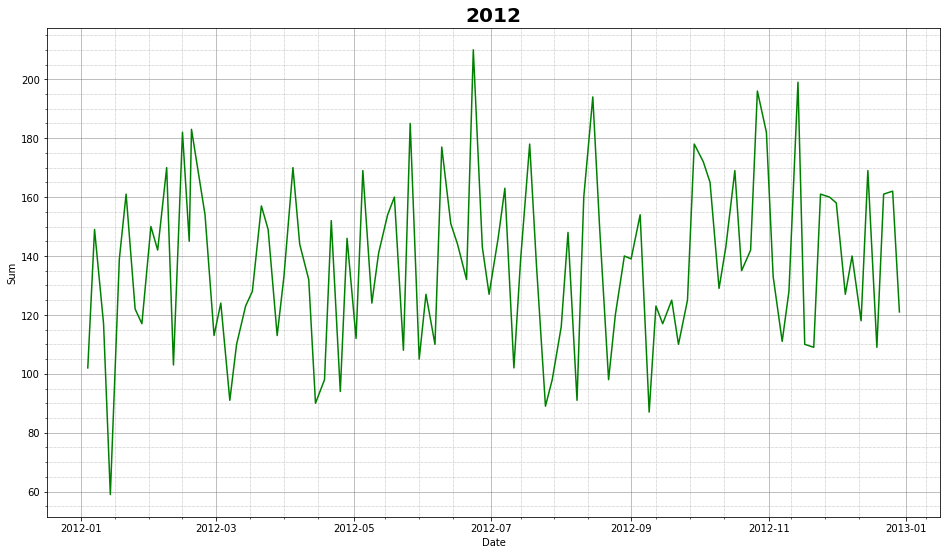

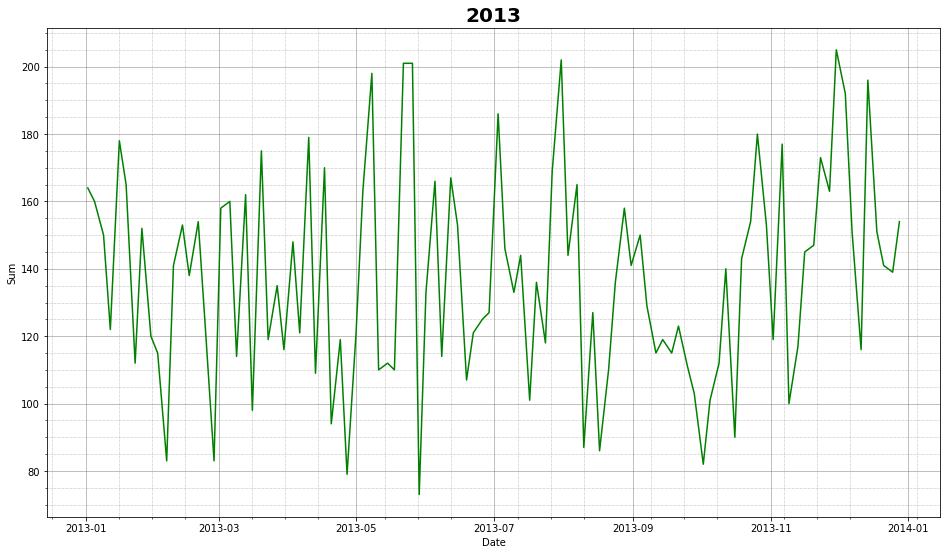

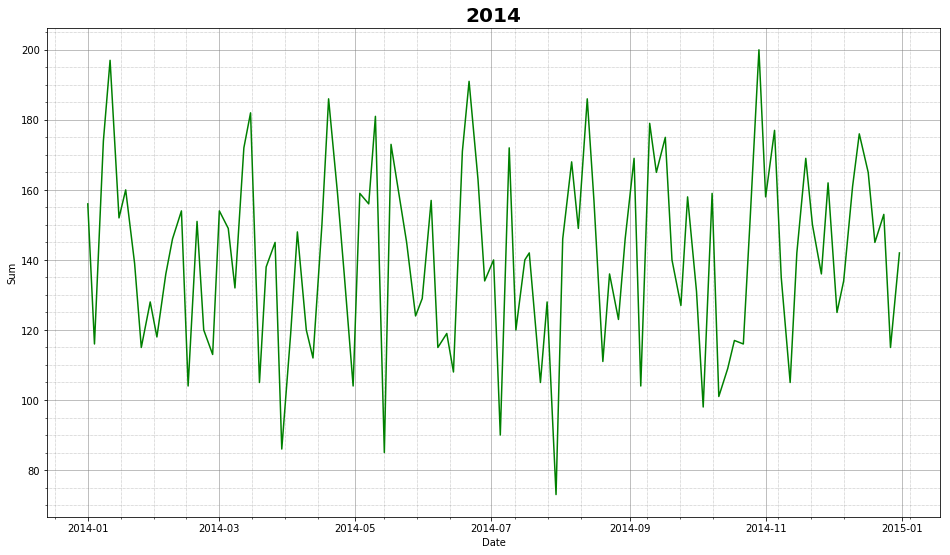

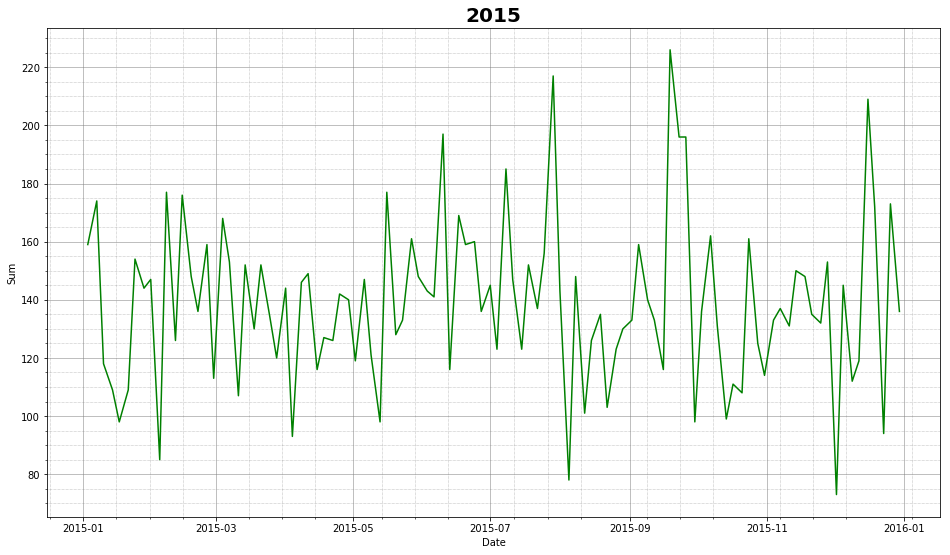

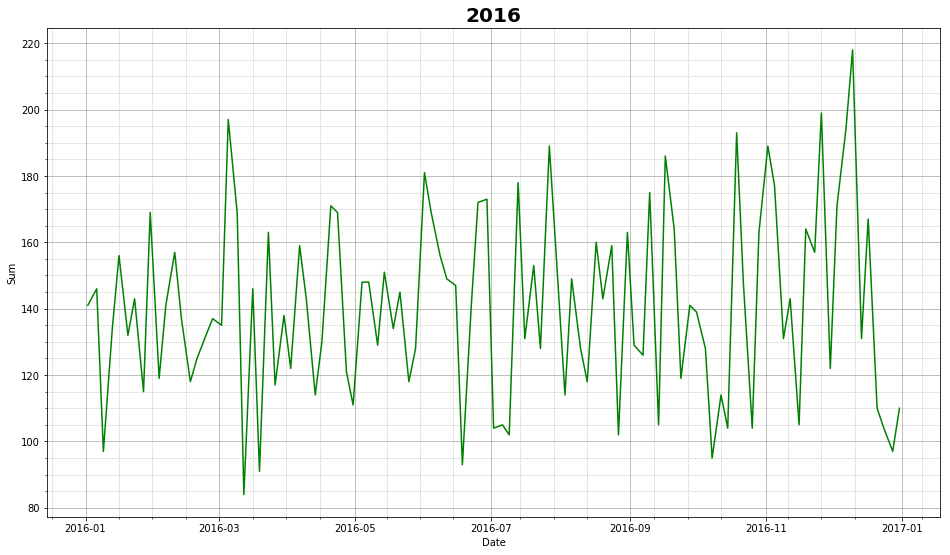

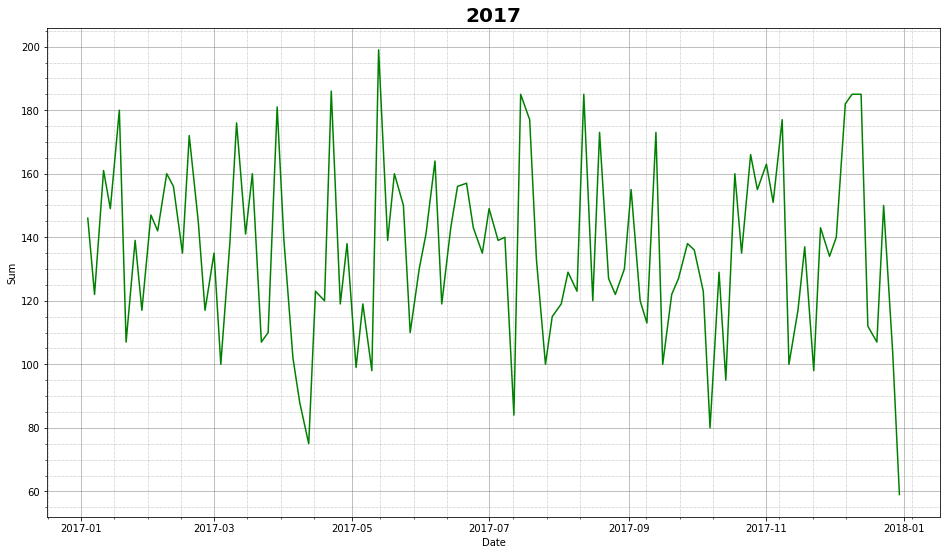

In [29]:
for god, podokvir in loto.groupby('GOD'): 
    fig1, ax1 = plt.subplots()
    ax1.set_title(god, fontweight="bold", fontsize="20")
    plt.xlabel('Date')
    plt.ylabel('Sum')

    plt.rcParams["figure.figsize"] = [16,9]

    plt.minorticks_on()

    plt.grid(which='major', linestyle='-', linewidth='0.5', color='grey' )
    plt.grid(which='minor', linestyle=':', linewidth='0.5', color='grey')

    datum = []
    suma_graf = []
    for i in range (0, num_of_rows):
        if ( loto['GOD'][i] == god):
            datum.append(loto['DATUM'][i])
            suma_graf.append(loto['SUMA'][i])
     
    ax1.plot(datum, suma_graf, color='g')

#### Analizirajmo koliko puta je bila dobivena određena suma dobitnih kombinacija
Uočimo, minimalna suma koju dobitne kombinacije mogu postići je $1 + 2 + 3 + 4 + 5 + 6 + 7 = 28$
te maksimalna suma je $39 + 38 + 37 + 36 + 35 + 34 + 33 = 252$.
Stoga kreirajmo matricu ${((252-28) \times 2)}$. Prvi stupac opisuje o kojoj se sumi radi dok drugi prikazuje koliko je puta ta suma bila dobivena

In [30]:
min_sum = 1 + 2 + 3 + 4 + 5 + 6 + 7
max_sum = 39 + 38 + 37 + 36 + 35 + 34 + 33
print ('Minimalna suma je ', min_sum, ' maksimalna suma je ', max_sum)

Minimalna suma je  28  maksimalna suma je  252


In [31]:
possible_sum= np.zeros([max_sum - min_sum + 1, 2], dtype=np.int64)
#popuni prvi stupac (vrijednost sume)
for i in range (0, max_sum - min_sum + 1):
    possible_sum[i][0]=i + min_sum

In [32]:
for i in range (0, num_of_rows):
    possible_sum[loto['SUMA'][i] - min_sum][1] += 1
suma, appear = possible_sum.T
#possible_sum

Prethodno kreiranu listu `possible_sum` prikažimo sortirano prema broju pojavljivanja pojedine sume.

In [33]:
from operator import itemgetter, attrgetter
sorted(possible_sum, key=itemgetter(1))

[array([28,  0]),
 array([29,  0]),
 array([30,  0]),
 array([31,  0]),
 array([32,  0]),
 array([33,  0]),
 array([34,  0]),
 array([35,  0]),
 array([36,  0]),
 array([37,  0]),
 array([38,  0]),
 array([39,  0]),
 array([40,  0]),
 array([41,  0]),
 array([42,  0]),
 array([43,  0]),
 array([44,  0]),
 array([45,  0]),
 array([46,  0]),
 array([47,  0]),
 array([48,  0]),
 array([49,  0]),
 array([50,  0]),
 array([51,  0]),
 array([52,  0]),
 array([53,  0]),
 array([54,  0]),
 array([55,  0]),
 array([56,  0]),
 array([57,  0]),
 array([58,  0]),
 array([60,  0]),
 array([61,  0]),
 array([62,  0]),
 array([63,  0]),
 array([64,  0]),
 array([66,  0]),
 array([67,  0]),
 array([68,  0]),
 array([70,  0]),
 array([71,  0]),
 array([72,  0]),
 array([74,  0]),
 array([76,  0]),
 array([77,  0]),
 array([81,  0]),
 array([195,   0]),
 array([203,   0]),
 array([204,   0]),
 array([206,   0]),
 array([207,   0]),
 array([208,   0]),
 array([212,   0]),
 array([213,   0]),
 array([214,

In [34]:
br=0
lista = []
print ('Sume koje se pojavljuju', appear.min(), 'puta (ujedno i minimalno): ')
for i in range (0, max_sum - min_sum +1):
    if possible_sum[i][1] == appear.min():
        lista.insert (br, i + min_sum)
        br += 1
print(lista)
print('Ukupno ih je', br)

Sume koje se pojavljuju 0 puta (ujedno i minimalno): 
[28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 62, 63, 64, 66, 67, 68, 70, 71, 72, 74, 76, 77, 81, 195, 203, 204, 206, 207, 208, 212, 213, 214, 215, 216, 219, 220, 221, 222, 223, 224, 225, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252]
Ukupno ih je 90


In [35]:
br / (max_sum - min_sum) * 100 

40.17857142857143

Uočimo da se čak $90$ od $224$ mogućih suma još nikada nisu pojavile tj $40.1786\%$.

In [36]:
appear_max_sum=[] #potrebno kasnije 
print ('Sume koje se pojavljuju najčešće tj.', appear.max(), 'puta: ')
for i in range (0, max_sum - min_sum +1):
    if possible_sum[i][1] == appear.max():
        print (i + min_sum)
        appear_max_sum.append(i+min_sum)

Sume koje se pojavljuju najčešće tj. 17 puta: 
119
143


# Niz barem dva puta izvučen
Prema broju redaka (`num_of_rows`) vidimo da je u 9 godina izvučeno 939 dobitnih kombinacija. Sljedeće pitanje koje si postavljamo glasi: 
<br>
    Postoji li dobitna kombinacija koja je barem dva puta izvućena?
<br>
Sa ciljem odgovora na postavljeno pitanje kreirajmo funkciju `twice_draw` koja će za nas to provjeravati. Funkcija prima niz brojeva koje provjeravamo te vraća koliko je puta taj broj bio izvućen.

In [37]:
def twice_draw (array_num_):
    br = 0
    suma = sum(array_num_)
    for i in range (0, num_of_rows):
        if loto['SUMA'][i] == suma:
            if loto['1BR'][i]  == array_num_[0] and loto['2BR'][i]  == array_num_[1] and loto['3BR'][i]  == array_num_[2] and loto['4BR'][i]  == array_num_[3] and loto['5BR'][i]  == array_num_[4] and loto['6BR'][i]  == array_num_[5] and loto['7BR'][i]  == array_num_[6] :
                br += 1
    #print ( array_num_, 'se pojavljuje', br, 'puta')
    return ( br )

Protrćimo kroz tablicu i odgovorimo na prethodno pitanje.

In [38]:
for i in range (0, num_of_rows):
    array_num = []
    array_num.append (loto['1BR'][i])
    array_num.append (loto['2BR'][i])
    array_num.append (loto['3BR'][i])
    array_num.append (loto['4BR'][i])
    array_num.append (loto['5BR'][i])
    array_num.append (loto['6BR'][i])
    array_num.append (loto['7BR'][i])
    appear_array = twice_draw (array_num)
    if appear_array > 1 :
        print (array_num, 'se pojavljuje', appear_array, 'puta')

# Moguće dobitne kombinacije
Kao što smo na početku izračunali moguće su $15 380 937$ dobitne kombinacije. Kreirajmo funkciju `permutacija` koja će ispisivati sve moguće nizove brojeva koji imaju određenu sumu.
<br>
Funkcija je rekurzivna te prima ciljnu sumu, niz brojeva, te listu u koju sprema dobitne kombinacije.

In [39]:
def permutacija ( goal_sum, array, result):
    br_elem = len(array)
    if goal_sum < sum(array):
        return
    for i in range (1, 40):
        if br_elem > 7:
            return
        
        if br_elem == 0:
            array.append(i)
            permutacija (goal_sum, array, result)
            array.pop()
            
        elif br_elem > 0:
            if i > array[br_elem - 1]:
                array.insert( br_elem, i)
                permutacija ( goal_sum, array, result)
                array.pop()
            elif br_elem == 7 and goal_sum == sum(array):
                result.append ( array )
                #print ( array )
                return

#### Moguće dobitne kombinacije sa sumom brojeva jednakoj sumi koja se najčešće izvućena.

In [40]:
result = []
for i in range (0, len(appear_max_sum)):
    permutacija (appear_max_sum[i], [], result)
len(result)

385505

Pomoću rekurzije dobili smo da postoji $167238$ mogućih dobitnih kombinacija čija je suma jednaka $119$. Iz predhodnih naredbi znamo da je takvih samo $34$ izvućeno. Iz toga slijedi da je svega $0.0203\%$ izvučeno dobitnih kombinacija sume $119$.

#### Moguće dobitne kombinacije sa sumom brojeva jednakoj srednjoj sumi izvućenih kombinacija.

In [41]:
print(loto['SUMA'].mean(), '-->', int(loto['SUMA'].mean()))

139.12140575079871 --> 139


In [42]:
mid_result = []
permutacija (int(loto['SUMA'].mean()), [], mid_result)
len(mid_result) # rezultat je 219336

219336

# Analiza sedam brojeva koji se najčešče pojavljuju 
Sljedeća pitanja na koja ćemo odgovoriti:
- jesu li kada činili dobitnu kombinaciju?
- kolika je njihova suma?
- koliko je mogućih kombinacija koje daju sumu jednaku njihovoj?

In [43]:
appear_num_ = (sorted(draw_number, key=itemgetter(1)))[32:39]
oft_appear_num = []
for i in range (0, 7):
    oft_appear_num.append(appear_num_[i][0])
oft_appear_num = sorted (oft_appear_num)
oft_appear_num

[1, 3, 7, 22, 26, 27, 30]

In [44]:
twice_draw (oft_appear_num)

0

In [45]:
sum(oft_appear_num)

116

In [46]:
oft_appear_num_res = []
permutacija (sum(oft_appear_num), [], oft_appear_num_res)
len(oft_appear_num_res) #153765

153765

In [47]:
#koliko ih je izvućeno sa sumom 116? 
for i in range (0, len(draw_number)):
    if possible_sum[i][0] == sum(oft_appear_num): #== 116
        print (possible_sum[i][1])
        break

In [48]:
possible_sum[sum(oft_appear_num)-min_sum][1] #rezultat je 9

9

Uoćimo da je 9 od 153765 nizova izvućeno čija je suma 116

-------------------------
Prethodnu analizu izvodili smo na $939$ dobitnih kombinacija što je $0.0061\%$ svih mogućih kombinacija
<br>
U daljnjoj analizi cilj mi je dodati smislene uvjete kojima bi reducirala moguće kombinacije te vidjeti je li koji niz izvućen u 2018. godini.